Prediction of Athlete Specialty Based on Run and Workstation Times
====================================================================

## Preprocessing and Model Training

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("../data/hyrox_elite15_synthetic_dataset.csv")

# Define run columns and workstation columns
run_columns = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8']
workstation_columns = ['ski', 'sled_push', 'sled_pull', 'burpees', 'row', 'farmers', 'lunges', 'wallballs']

# Combine run and workstation columns as features
feature_columns = run_columns + workstation_columns

# Separate features and target
X = df[feature_columns].fillna(df[feature_columns].mean())
y = df["specialty"]

# Label encoding for athlete specialty
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show shapes
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y_encoded shape: {y_encoded.shape}")
print(f"Specialty classes: {label_encoder.classes_}")


X_scaled shape: (632, 16)
y_encoded shape: (632,)
Specialty classes: ['Runner' 'Working Station Specialist']


## Build and Train Model

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_scaled.shape[1]
num_classes = len(label_encoder.classes_)

# Build model
model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,666 (6.51 KB)

 Trainable params: 1,666 (6.51 KB)

 Non-trainable params: 0 (0.00 B)

## Train/Test Split + Training

In [18]:
from sklearn.model_selection import train_test_split

# Split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=20,
    verbose=1
)


Epoch 1/10


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6693 - loss: 0.5993 - val_accuracy: 0.8346 - val_loss: 0.4939
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6693 - loss: 0.5993 - val_accuracy: 0.8346 - val_loss: 0.4939
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.4995 - val_accuracy: 0.8425 - val_loss: 0.4101
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.4995 - val_accuracy: 0.8425 - val_loss: 0.4101
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.4453 - val_accuracy: 0.8504 - val_loss: 0.3588
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.4453 - val_accuracy: 0.8504 - val_loss: 0.3588
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.4035 - val_accuracy: 0.8583 - val_loss: 0.3238
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.4035 - val_accuracy: 0.8583 - val_loss: 0.3238
Epo

## Visualize Training History

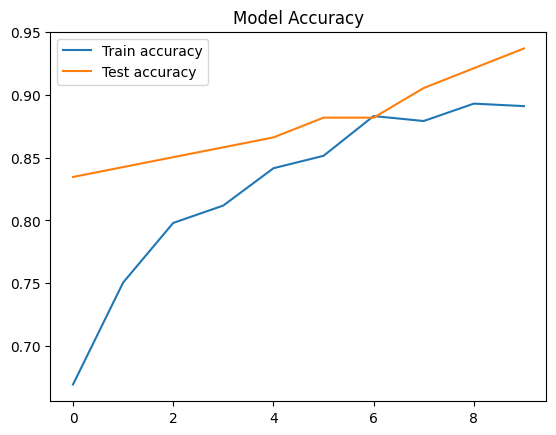

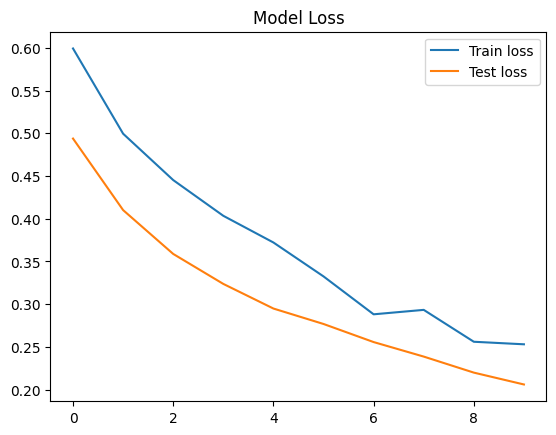

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Test accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Test loss")
plt.legend()
plt.title("Model Loss")
plt.show()

## Overall Model Evaluation

In [20]:
# Evaluation on test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9370
Test Loss: 0.2061


## Confusion Matrix

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7196007da5c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


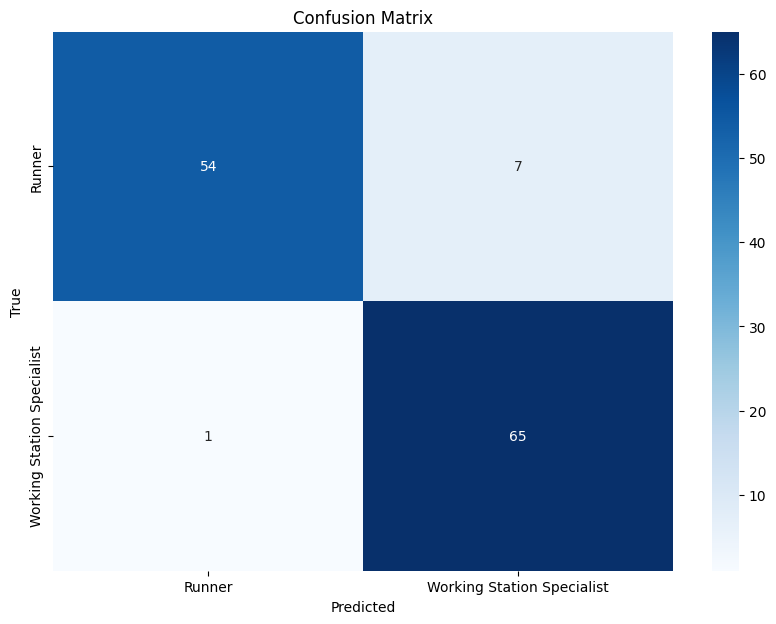

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Network predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Precision, Recall, F1-Score

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

                            precision    recall  f1-score   support

                    Runner       0.98      0.89      0.93        61
Working Station Specialist       0.90      0.98      0.94        66

                  accuracy                           0.94       127
                 macro avg       0.94      0.94      0.94       127
              weighted avg       0.94      0.94      0.94       127

